In [1]:
from node import Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

## Model Parameters

The model is initialized with several parameters:

- *A distance matrix*, a square matrix where entries represent distances between nodes
- *The initial phases of the nodes* (i.e. at $t=0$)
- $\epsilon$ and $b$ parameters of the response curve
- The amount the phase of each node increase each step 

In [3]:
# Number of nodes
n = 500

In [4]:
# Random (uniformly) distributed 2d node locations
locations = np.random.rand(n, 2)*400

*Note: The minimum distance between nodes (to send a signal) is 1, a distance of 0 means the nodes will not send signals to each other*

In [5]:
# Use sci-py to convert locations to nxn distance matrix
distances = np.round(squareform(pdist(locations)))+1

In [6]:
# Nodes can be made to not communicate by setting distances to zero
remove_links = np.random.choice([0,1], size=(n,n), p=[0.25, 0.75])

In [7]:
distances = distances*remove_links

In [8]:
# Alternatively make all nodes communicate at the same speed
# distances = np.ones((n,n))

In [9]:
initial_phases = np.random.random(size=n)

In [10]:
# Threshold value at which nodes fire
phase_step = 0.001

## Initialize and Run the Model

In [11]:
foo = Model(30000, distances, initial_phases, 0.01, 0.05, phase_step)

In [12]:
foo.run()

## Results

The history of the model are stored as attributes on the model

- `Model.phases`: 2d array showing the phase of the nodes at each step of the model
- `Model.events`: 2d array showing event history for each node

In [13]:
# Extract the phases and convert them to an angle
cos_p = np.cos(2*np.pi*foo.phases)

## Plots

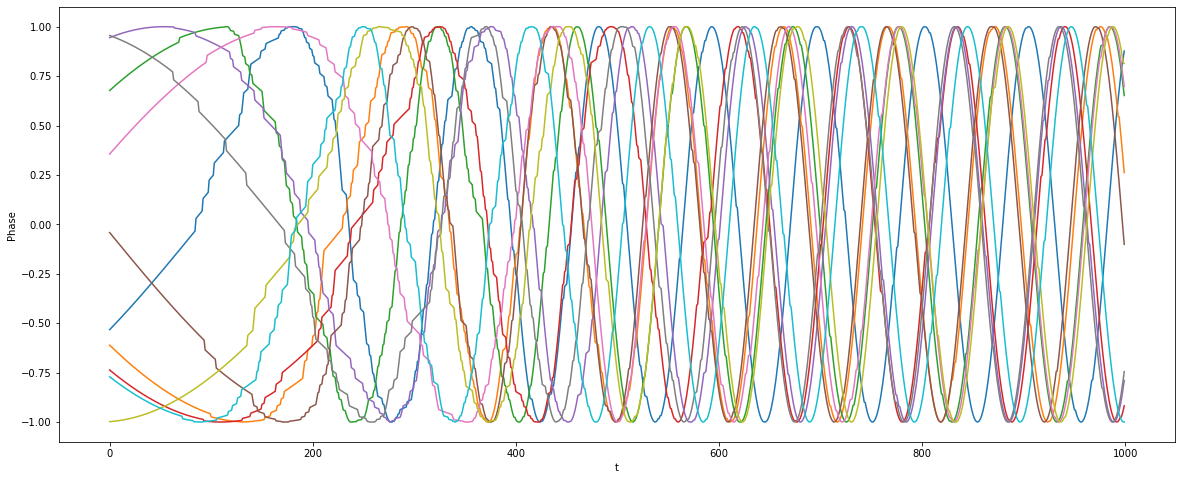

In [14]:
plt.figure(figsize=(20,8))
plt.plot(cos_p[:1000, :10]);
plt.xlabel('t')
plt.ylabel('Phase');

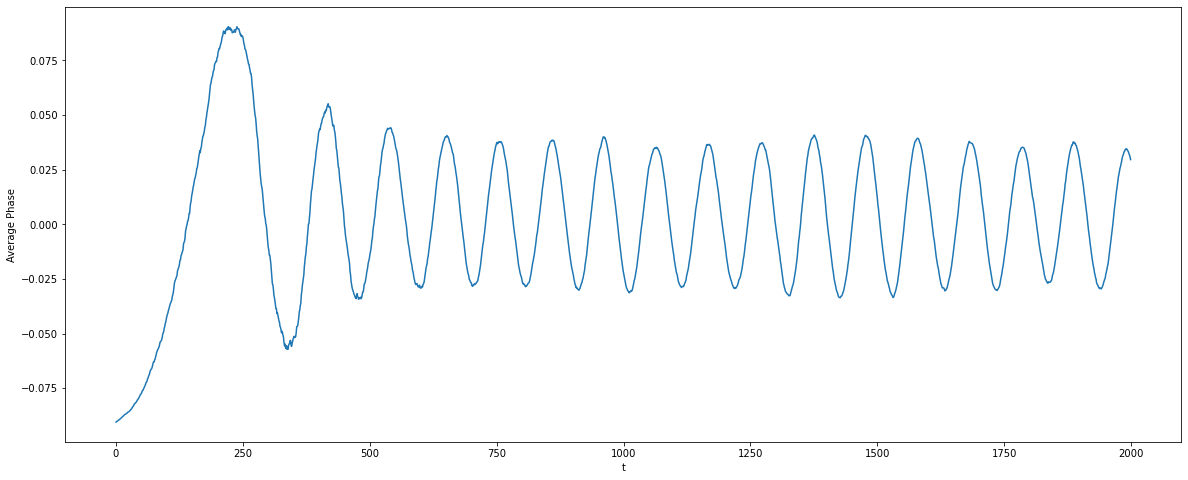

In [15]:
plt.figure(figsize=(20,8))
plt.plot(cos_p.mean(axis=1)[:2000]);
plt.xlabel('t')
plt.ylabel('Average Phase');

In [16]:
idx = np.argsort(cos_p[0])

In [17]:
cos_p = cos_p[:, idx]

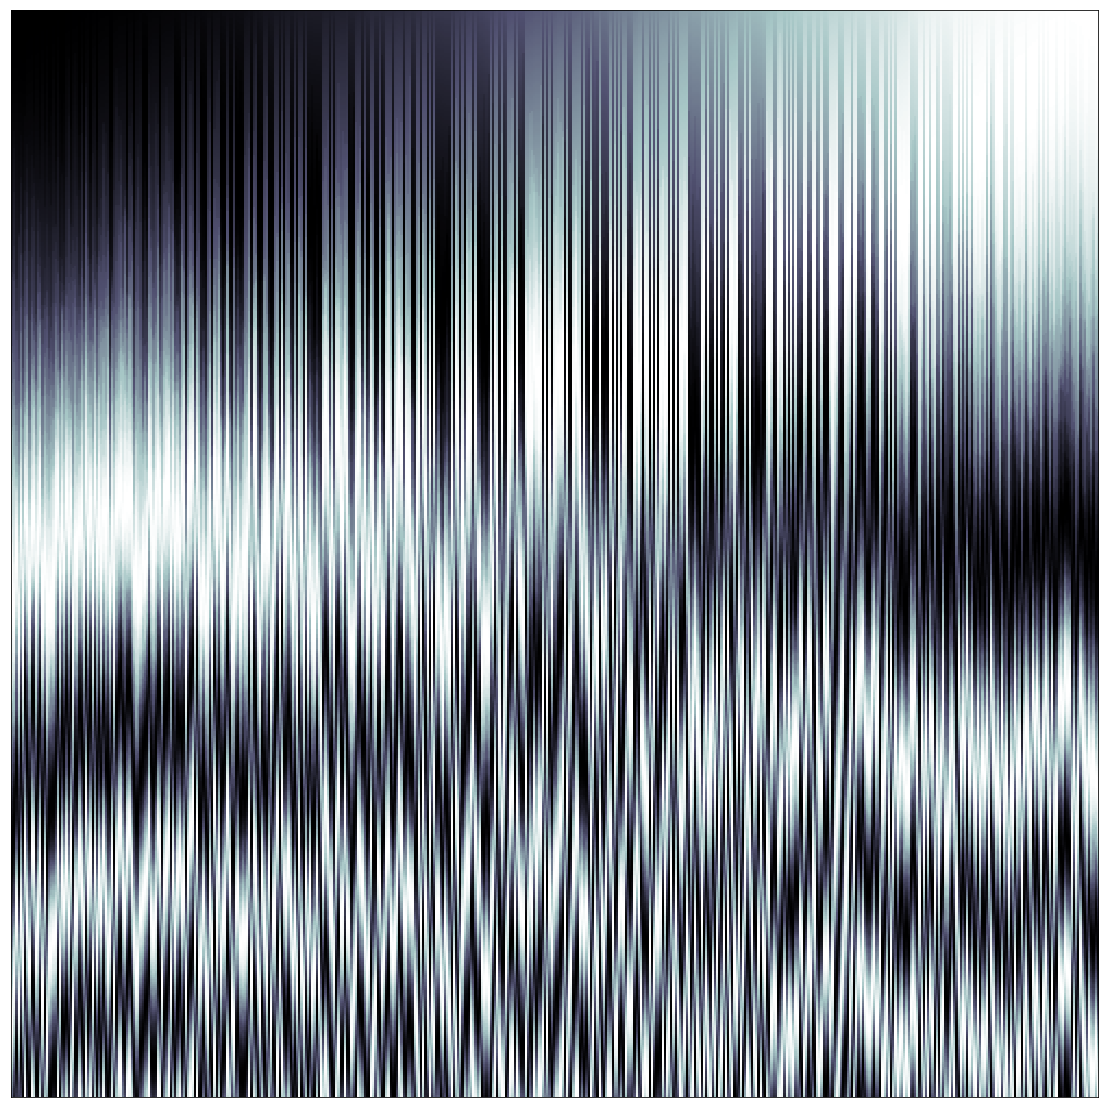

In [18]:
f, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.matshow(cos_p[:n], cmap=plt.get_cmap('bone'))
ax.set_xticks([])
ax.set_yticks([]);